#### Data/Code/Definition Sources: While in many cells I document if code was referenced from an external source, here is a list of sources in case I missed them. This is roughly ordered in descendnig order by frequency of use:




*   Yahoo! Finance
*   https://github.com/borisbanushev/stockpredictionai/blob/master/readme.md
*   https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial
*   https://www.investopedia.com/
*   https://www.udemy.com/course/python-for-finance-and-trading-algorithms/
*   https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
*   https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
*   https://www.guggenheiminvestments.com/mutual-funds/resources/interactive-tools/asset-class-correlation-map
*   https://www.forbes.com/sites/tomtaulli/2019/03/09/deep-learning-when-should-you-use-it/#33f08394e368 
*   https://www.youtube.com/watch?v=e8Yw4alG16Q
*   https://machinelearningmastery.com/time-series-data-stationary-python/
*   https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/










# Introduction

I chose to analyze S&P 500 index over time. My project concludes with comparing an ARIMA model against a LSTM model. If I continue with this project, it would be interesting to see how Covid impacts how the S&P market moves. Why did I choose the S&P 500 index?



## First, what is the S&P 500 Index?
The S&P 500 or Standard & Poor's 500 Index is a market-capitalization-weighted index of the 500 largest U.S. publicly traded companies. The index is widely regarded as the best gauge of large-cap U.S. equities. Other common U.S. stock market benchmarks include the Dow Jones Industrial Average or Dow 30 and the Russell 2000 Index, which represents the small-cap index (https://www.investopedia.com/terms/s/sp500.asp). 




## Preprocessing

### Install necessary packages

In [ ]:
!pip install utils

In [ ]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 60kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


### Import libraries

In [ ]:
# from utils import *

# import pandas as pd
# import time
# import numpy as np

# from mxnet import nd, autograd, gluon
# from mxnet.gluon import nn, rnn
# import mxnet as mx
# import datetime
# import seaborn as sns

# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.decomposition import PCA

# import math

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# import math 



In [ ]:
from utils import *

import pandas as pd
import time
import numpy as np

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


import numpy as np # linear algebra
import random
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable

# The Data

Price - S&P 500 daily closing price

While I am interested in S&P 500 daily pricing, I'm not sure what other variables could impact my model or future models. A good place to start is determining what assets are correlated to the S&P 500 index. I used this chart from Guggenheim as some assets that could be of interest https://www.guggenheiminvestments.com/mutual-funds/resources/interactive-tools/asset-class-correlation-map



**Figure 1: Assets' Correlation Score to the S&P 500 Index**
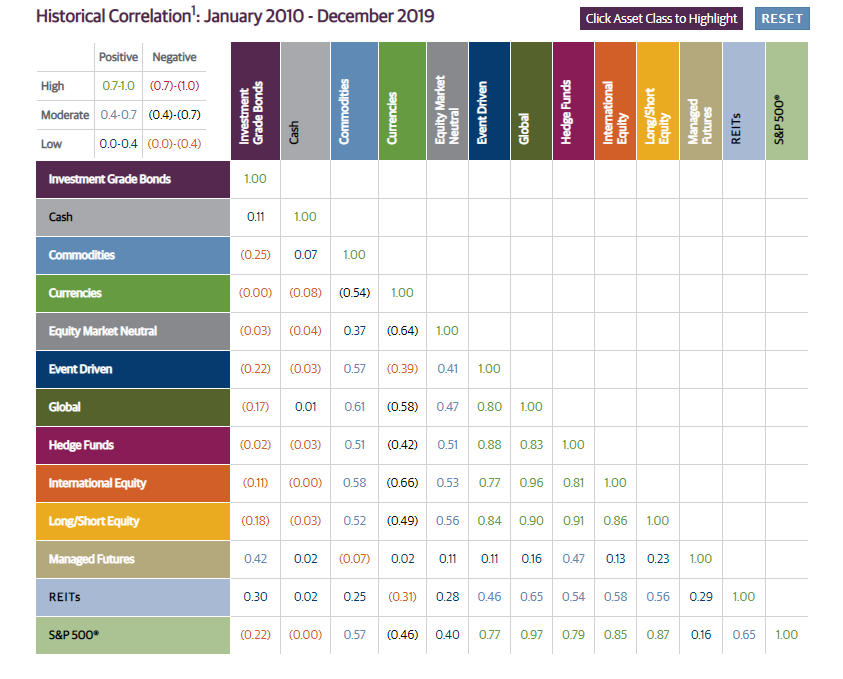

In [ ]:
# code source https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import files
uploaded = files.upload()

Saving SPglobal.csv to SPglobal (1).csv


In [ ]:

df = pd.read_csv('/content/SPglobal.csv', header=0, parse_dates=[0])
df.tail(3)

,Date,Price,A US EQUITY,AAPL US Equity,ABMD US EQUITY,MSFT US EQUITY,ATVI US EQUITY,Bear,VT US EQUITY,REIT INDEX,BCOM INDEX,TSLA_Price,AAPL_Price
3168,2020-04-21,2736.56,0.4612,0.9322,0.3587,0.5103,0.3678,1,66.57,1753.06,60.7754,705.63,275.03
3169,2020-04-22,2799.31,1.0314,0.7607,0.8324,0.4469,0.2617,1,67.30,1759.79,60.2394,725.15,282.97
3170,2020-04-23,2797.80,1.0314,0.7607,0.8324,0.4469,0.2617,1,67.30,1759.79,60.2394,725.15,282.97


## Check if Guggenheim's correlation scores match my data

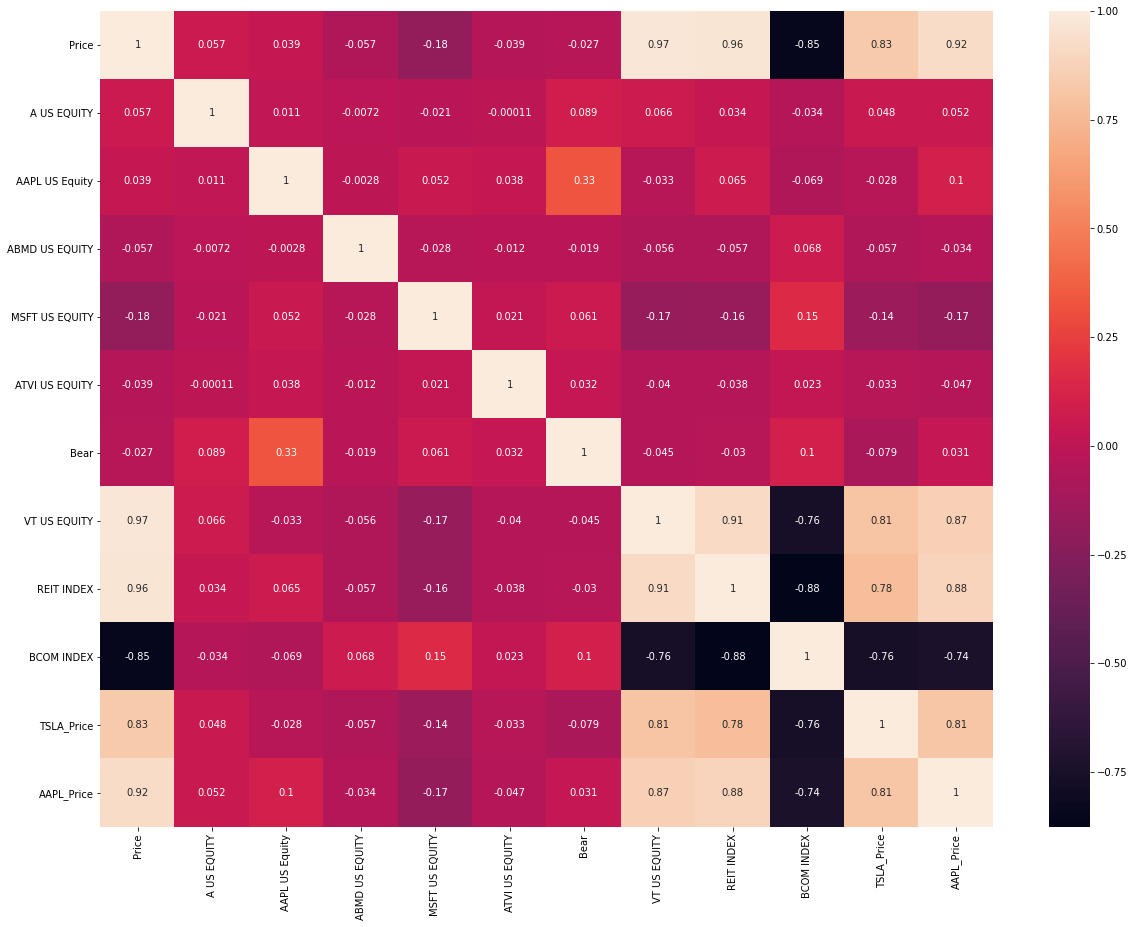

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True )
plt.show()

According to figure 1, REIT's should have a 65% correlation to the price of the S&P, my REIT INDEX shows a 96% score. 

Commodities a 57% correlation to the price of the S&P, my Commodities index (BCOM INDEX) shows a -85% score. 

Global a 97% correlation to teh price of the S&P, my global index (Vanguard Globbal ETF) reflects a 97% correlation as well. Nice!


### However, I'm curuious why some of these other indices do not match Guggenheim's chart. Possible theories:


1.   My dataset ranges from 8/19/2011 - 4/23/2020. Compared to Guggeheim's 1/2010 - 12/2019
2.   I'm highly likely using different assets than Guggenheim used. 



## What does our data look like? What if our training dataset was the first 70% of our observations

In [ ]:
num_training_days = int(df.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    df.shape[0]-num_training_days))

Number of training days: 2219. Number of test days: 952.


In [ ]:
df.iloc[2220]

Date              2017-09-16 00:00:00
Price                         2500.23
A US EQUITY                    0.1338
AAPL US Equity                 0.6624
ABMD US EQUITY                 0.2473
MSFT US EQUITY                 0.5252
ATVI US EQUITY                 0.9552
Bear                                0
VT US EQUITY                    70.87
REIT INDEX                    1768.18
BCOM INDEX                    85.0828
TSLA_Price                        385
AAPL_Price                     158.67
Name: 2220, dtype: object

In [ ]:
df

,Date,Price,A US EQUITY,AAPL US Equity,ABMD US EQUITY,MSFT US EQUITY,ATVI US EQUITY,Bear,VT US EQUITY,REIT INDEX,BCOM INDEX,TSLA_Price,AAPL_Price
0,2011-08-19,1123.53,1.2427,0.9043,1.3600,1.0238,0.7541,1,42.43,838.10,159.0033,22.30,50.861
1,2011-08-20,1123.53,1.2427,0.9043,1.3600,1.0238,0.7541,1,42.46,840.06,159.8813,21.95,50.920
2,2011-08-21,1123.53,1.2427,0.9043,1.3600,1.0238,0.7541,1,43.93,862.07,160.6887,22.96,53.371
3,2011-08-22,1123.82,0.5705,0.6929,1.3600,0.8673,0.2527,1,44.13,873.55,158.3737,23.87,53.740
4,2011-08-23,1162.35,0.1785,0.6566,1.3600,1.0612,0.5111,0,43.19,855.85,159.2828,23.11,53.389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,2020-04-19,2874.56,0.1379,0.9904,0.1311,0.4442,0.3881,1,65.19,1741.31,59.5078,686.72,268.370
3167,2020-04-20,2823.16,0.5801,1.0291,0.7982,0.4357,0.3124,1,66.62,1770.95,60.6816,732.11,276.100
3168,2020-04-21,2736.56,0.4612,0.9322,0.3587,0.5103,0.3678,1,66.57,1753.06,60.7754,705.63,275.030
3169,2020-04-22,2799.31,1.0314,0.7607,0.8324,0.4469,0.2617,1,67.30,1759.79,60.2394,725.15,282.970


In [ ]:
print('There are {} number of days in the dataset.'.format(df.shape[0]))

There are 3171 number of days in the dataset.


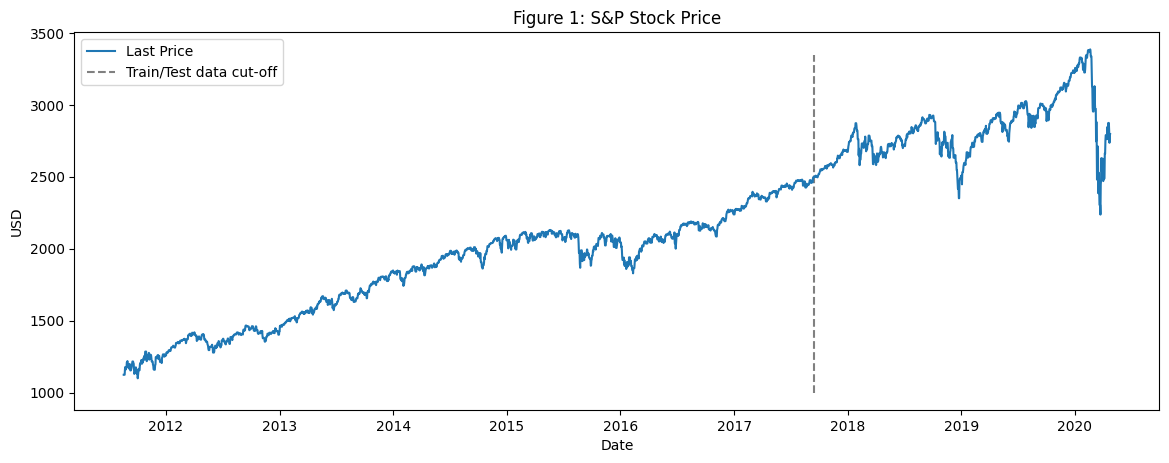

In [ ]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df['Date'], df['Price'], label='Last Price')
plt.vlines(datetime.date(2017,9, 16), 1000, 3350, linestyles='--', colors='grey', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: S&P Stock Price')
plt.legend()
plt.show()

In [ ]:
num_training_days = int(df.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    df.shape[0]-num_training_days))


Number of training days: 2219. Number of test days: 952.


# Technical Indicators - Taken from Investopedia



**Simple Moving Average (SMA)** - calculates the arithmetic mean of a security over a number (n) of time periods, A.
\begin{aligned} &SMA = \frac{A_1 + A_2 + \dotso + A_n}{n} \\ &\textbf{where:}\\ &A=\text{average in period }n\\ &n=\text{number of time periods}\\ \end{aligned} 
​	  
SMA= 
n
A 
1
​	 +A 
2
​	 +…+A 
n
​	 
​	 
where:
A=average in period n
n=number of time periods
​	

**Exponential Moving Average (EMA)** - To calculate an EMA, you must first compute the simple moving average (SMA) over a particular time period. Next, you must calculate the multiplier for weighting the EMA (the smoothing), which typically follows the formula: [2 ÷ (selected time period + 1)]. So, for a 20-day moving average, the multiplier would be [2/(20+1)]= 0.0952. Then you use the smoothing factor combined with the previous EMA to arrive at the current value. **The EMA thus gives a higher weighting to recent prices, while the SMA assigns equal weighting to all values.**

\begin{aligned} &EMA_t = [V_t \times (\frac{\text{s}}{1 + d})] + EMA_y \times [1 - (\frac{\text{s}}{1 + d})] \\ &\textbf{where:}\\ &EMA_t = \text{EMA today}\\ & V_t = \text{Value today}\\ &EMA_t = \text{EMA today}\\ &s=\text{smoothing}\\ &d=\text{number of days}\\ \end{aligned} 
​	  
EMA 
t
​	 =[V 
t
​	 ×( 
1+d
s
​	 )]+EMA 
y
​	 ×[1−( 
1+d
s
​	 )]
where:
EMA 
t
​	 =EMA today
V 
t
​	 =Value today
EMA 
t
​	 =EMA today
s=smoothing
d=number of days
​	

**Moving Average Convergence Divergence – MACD** is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

Gives the short to medium term trend of the price action https://www.youtube.com/watch?v=ukgqiFQuA_w

In [ ]:
# codes used from https://www.udemy.com/course/python-for-finance-and-trading-algorithms/ and https://github.com/borisbanushev/stockpredictionai/blob/master/readme.md


def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean() 
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['Signal'] = dataset['MACD'].ewm(span=9).mean() 

    # Create Bollinger Bands
    dataset['Close: 30 Day Mean'] = dataset['Price'].rolling(window=20).mean()
    dataset['upper_band'] = dataset['Close: 30 Day Mean'] + 2*dataset['Price'].rolling(window=20).std()
    dataset['lower_band'] = dataset['Close: 30 Day Mean'] - 2*dataset['Price'].rolling(window=20).std()

    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    
    return dataset

In [ ]:
dataset_TI_df = get_technical_indicators(df)

In [ ]:
# dfb.head()

In [ ]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for S&P 500 - last {} days.'.format(last_days))
    # plt.xlabel('Date')
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['Signal'],label='Signal Line', linestyle='dashdot')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

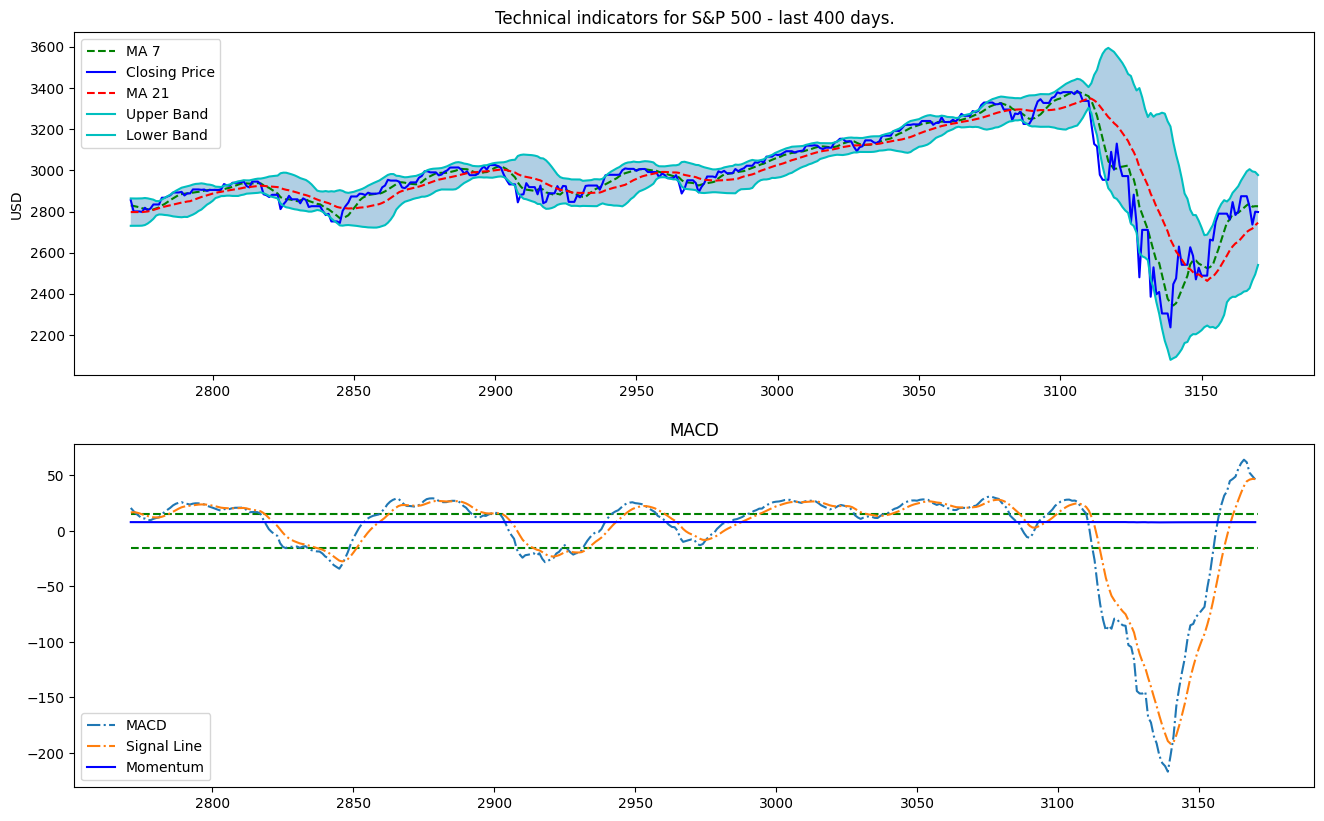

In [ ]:
plot_technical_indicators(dataset_TI_df, 400)

The signal line is the 9 day ema of the MAC-D line, or a more smooth, "less choppy" version of the MACD line.

One indicator to buy, could be when the MACD line pases the signal line

## 3.4. Fourier transforms for trend analysis

FFT (Fast Fourier Transform) refers to a way the discrete Fourier Transform (DFT) can be calculated efficiently, by using symmetries in the calculated terms. The symmetry is highest when n is a power of 2, and the transform is therefore most efficient for these sizes. (https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html)



In [ ]:
data_FT = dataset_TI_df[['Date', 'Price']]

In [ ]:
clz_fft = np.fft.fft(np.asarray(data_FT['Price'].tolist()))

In [ ]:
clz_fft[0]

(6791772.14-1.4699708117404953e-10j)

In [ ]:
data_FT.head()

,Date,Price
0,2011-08-19,1123.53
1,2011-08-20,1123.53
2,2011-08-21,1123.53
3,2011-08-22,1123.82
4,2011-08-23,1162.35


In [ ]:
close_fft = np.fft.fft(np.asarray(data_FT['Price'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

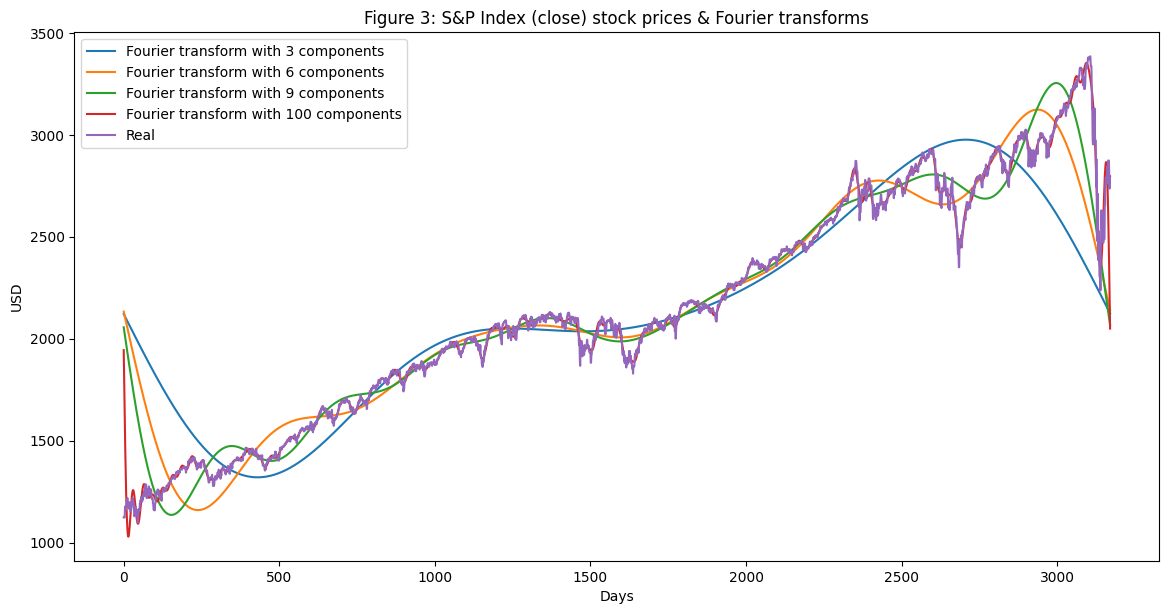

In [ ]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Price'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: S&P Index (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

## Deque (pronounced "Deck")

Looks like a list, but faster to add elements to the beginning or end. However, if you want to access element within a container, a list is better. 

useful methods: 


*   **rotate** - foo.rotate(1): shift everything in your contaring 1 place to the right 
*   **maxlen** - foo.deque("hello", maxlen=5): continer will always be a length of 5 at most, even if you append/extend




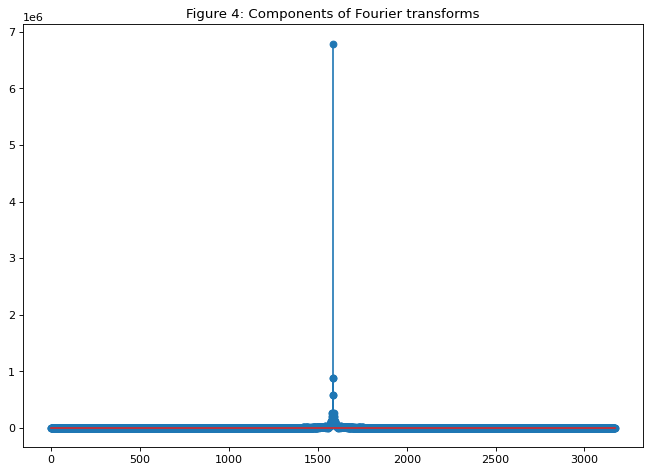

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure 4: Components of Fourier transforms')
plt.show()

## Test if our data is stationary

https://machinelearningmastery.com/time-series-data-stationary-python/

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

### Augmented Dickey-Fuller test

 a statistical test designed to explicitly comment on whether a univariate time series is stationary.

*   Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

*   Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

1.   p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
2.   p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.







In [ ]:
from statsmodels.tsa.stattools import adfuller
X = df['Price'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.393766
p-value: 0.585261
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Run the same test below, but log transform the dataset to make the distribution of values more linear and better meet the expectations of this statistical test.

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = df['Price'].values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.773360
p-value: 0.393765
	1%: -3.432
	5%: -2.862
	10%: -2.567


We can see that the value is larger than the critical values, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary. It has some time dependent structure.

## Arima Model

AR - the correlation between the previous time period and the current time period

MA - Good for looking at ts data visually. There is always going to be some noise in ts, for instance, one day a customer could come into a shop and buy 100 items but normally a shopt might only sell 50 items at most. The point of a moving average is smooth over this data

https://www.youtube.com/watch?v=e8Yw4alG16Q

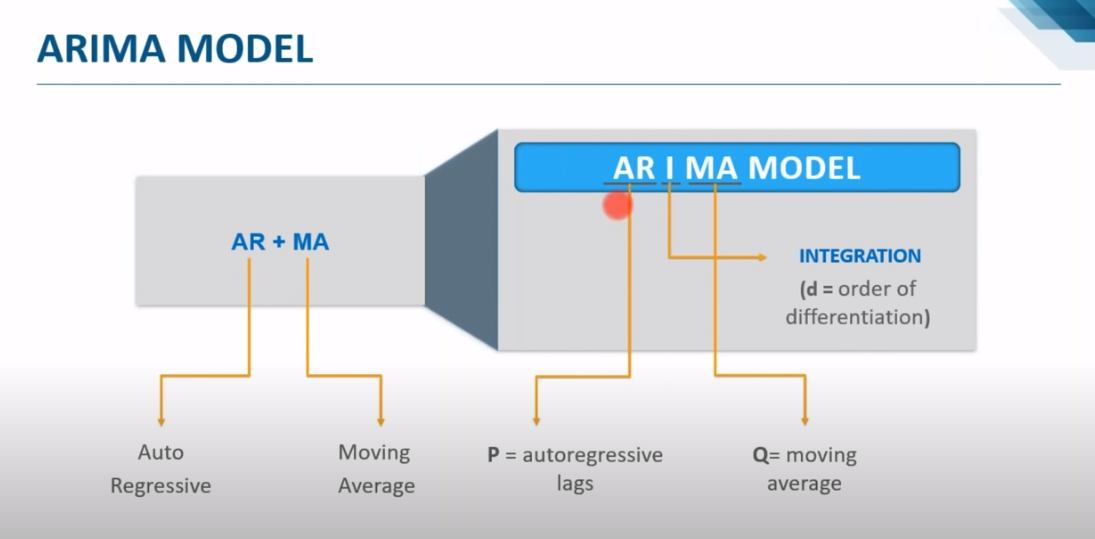

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = data_FT['Price']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 3170
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14031.897
Method:                       css-mle   S.D. of innovations             20.237
Date:                Sun, 31 May 2020   AIC                          28077.794
Time:                        20:07:49   BIC                          28120.224
Sample:                             1   HQIC                         28093.013
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5280      0.348      1.518      0.129      -0.154       1.210
ar.L1.D.Price    -0.1505      0.018     -8.475      0.000      -0.185      -0.116
ar.L2.D.Price     0.0388      0.018     

In [ ]:
# !pip install pandas.tools.plotting

# from pandas.tools.plotting import autocorrelation_plot

# # Throws an error: ModuleNotFoundError: No module named 'pandas.tools'

# However, from pandas.plotting import autocorrelation_plot works perfectly.

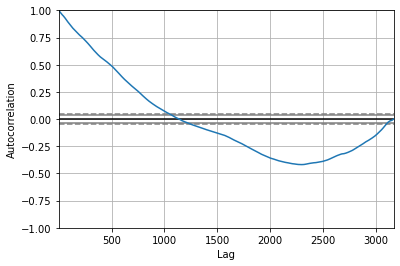

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [ ]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
# trainerror = mean_squared_error(train, predictions)
# print('Test MSE: %.3f' % error)

testerror = math.sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % testerror)

Test MSE: 30.857


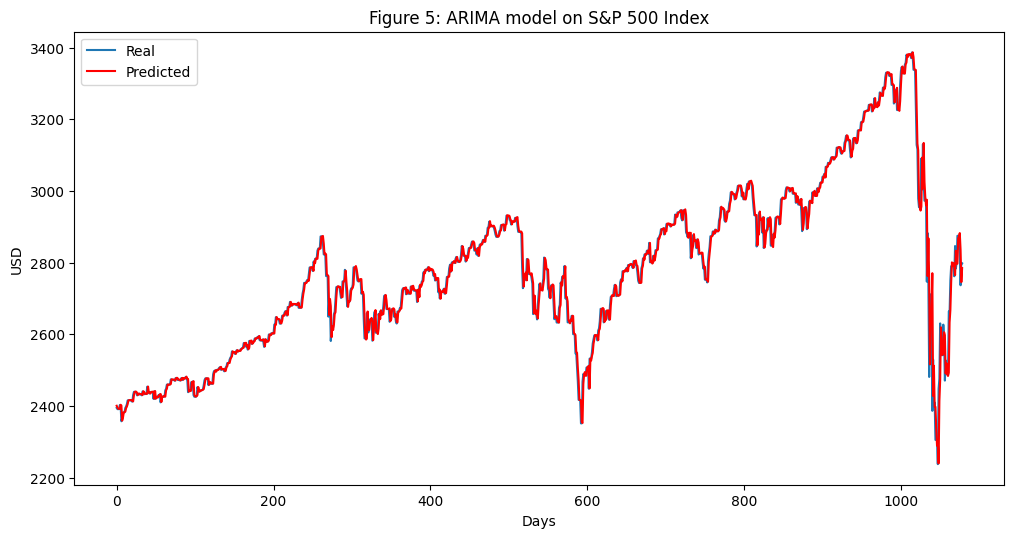

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on S&P 500 Index')
plt.legend()
plt.show()

# Deep Learning and when to use it

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. It has been around since the 1950s.  (https://machinelearningmastery.com/what-is-deep-learning/).

In one of the earlier lectures, we learned that Deep Learning, while ipmressive, is not always the best tool. Dr. Raff explained that often there are other machine learning approaches that perform much more effective than a neural network. “Deep learning is most effective when there isn't an obvious structure to the data that you can exploit and build features around,” said Dr. Scott Clark, who is the co-founder and CEO of SigOpt. “Common examples of this are text, video, image, or time series datasets. The great thing about deep learning is that it will automatically build and exploit patterns in the data in order to make better decisions (https://www.forbes.com/sites/tomtaulli/2019/03/09/deep-learning-when-should-you-use-it/#33f08394e368)







# Compare Arima Model performance to Long Short-Term Memory Network (LSTM) Performance

Code source: https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

Explanations and some code: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 

## Characteristics about LSTM

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.

As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected through layers.

In [ ]:
# dataset_ex_df = pd.read_csv('/content/AppleVSputcall3.csv', header=0, parse_dates=[0], date_parser=parser)
df = pd.read_csv('/content/SPglobal.csv', header=0, parse_dates=[0])


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3171 non-null   datetime64[ns]
 1   Price           3171 non-null   float64       
 2   A US EQUITY     3171 non-null   float64       
 3   AAPL US Equity  3171 non-null   float64       
 4   ABMD US EQUITY  3171 non-null   float64       
 5   MSFT US EQUITY  3171 non-null   float64       
 6   ATVI US EQUITY  3171 non-null   float64       
 7   Bear            3171 non-null   int64         
 8   VT US EQUITY    3171 non-null   float64       
 9   REIT INDEX      3171 non-null   float64       
 10  BCOM INDEX      3171 non-null   float64       
 11  TSLA_Price      3171 non-null   float64       
 12  AAPL_Price      3171 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 322.2 KB


In [ ]:
# set the index
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3171 entries, 2011-08-19 to 2020-04-23
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           3171 non-null   float64
 1   A US EQUITY     3171 non-null   float64
 2   AAPL US Equity  3171 non-null   float64
 3   ABMD US EQUITY  3171 non-null   float64
 4   MSFT US EQUITY  3171 non-null   float64
 5   ATVI US EQUITY  3171 non-null   float64
 6   Bear            3171 non-null   int64  
 7   VT US EQUITY    3171 non-null   float64
 8   REIT INDEX      3171 non-null   float64
 9   BCOM INDEX      3171 non-null   float64
 10  TSLA_Price      3171 non-null   float64
 11  AAPL_Price      3171 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 322.1 KB


In [ ]:
df_SPX=df[['Price']]
df_SPX.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3171 entries, 2011-08-19 to 2020-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3171 non-null   float64
dtypes: float64(1)
memory usage: 49.5 KB


### Rescaling Data

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. The example code that I found, rescaled the data to the range of -1-to-1, also called normalizing. We can normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [ ]:
# df_ibm=df_ibm.fillna(method='ffill')

scaler = MinMaxScaler(feature_range=(-1, 1))    # making a scale value from -1 to 1 
df_SPX['Price'] = scaler.fit_transform(df_SPX['Price'].values.reshape(-1,1))    # now we are fitting it

The sequence of values is important with ts data. We'll split the first 80% of observations as my training set and the last 20% as my test set.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period; we use 20.

In [ ]:
# function to create train, test data given stock data and sequence length
def load_data(stock, look_back):
    data_raw = stock.to_numpy()  # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
        # print(data)
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 20 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_SPX, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2521, 19, 1)
y_train.shape =  (2521, 1)
x_test.shape =  (630, 19, 1)
y_test.shape =  (630, 1)


In [ ]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

#train_X = train_X.view([-1, x_train.shape[0], 1])
#test_X = test_X.view([-1, x_test.shape[0], 1])
#train_Y = train_Y.view([y_train.shape[0], 1])

In [ ]:
y_train.size(),x_train.size()

(torch.Size([2521, 1]), torch.Size([2521, 19, 1]))

In [ ]:
n_steps = look_back-1
batch_size = 1606
#n_iters = 3000
num_epochs = 100 #n_iters / (len(train_X) / batch_size)
#num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(x_train,y_train)
test = torch.utils.data.TensorDataset(x_test,y_test)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
# Build model
#####################
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # One time step
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss(size_average=True)

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [ ]:
# Train model
#####################

hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.012628894299268723
Epoch  20 MSE:  0.00942969135940075
Epoch  30 MSE:  0.0029237670823931694
Epoch  40 MSE:  0.0013944186503067613
Epoch  50 MSE:  0.0010412756819278002
Epoch  60 MSE:  0.0005875460337847471
Epoch  70 MSE:  0.0004968822468072176
Epoch  80 MSE:  0.0004040925414301455
Epoch  90 MSE:  0.0003726455906871706


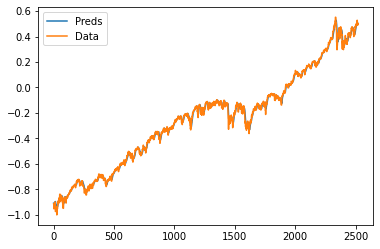

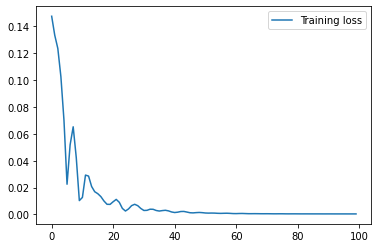

In [ ]:
plt.plot(y_train_pred.detach().numpy(), label="Preds")
plt.plot(y_train.detach().numpy(), label="Data")
plt.legend()
plt.show()

plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [ ]:
np.shape(y_train_pred)

torch.Size([2521, 1])

The RMSE can be thought of as distance, on average, of a data point from the fitted line, measured along a vertical line (https://www.vernier.com/til/1014)

In [ ]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.60 RMSE
Test Score: 70.19 RMSE


Accoriding to a forum post (https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values), model is considered "good" if the test RMSE is close to the training RMSE

In [ ]:
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)

testScore = mean_squared_error(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.2f MSE' % (testScore))

Test Score: 4926.25 MSE


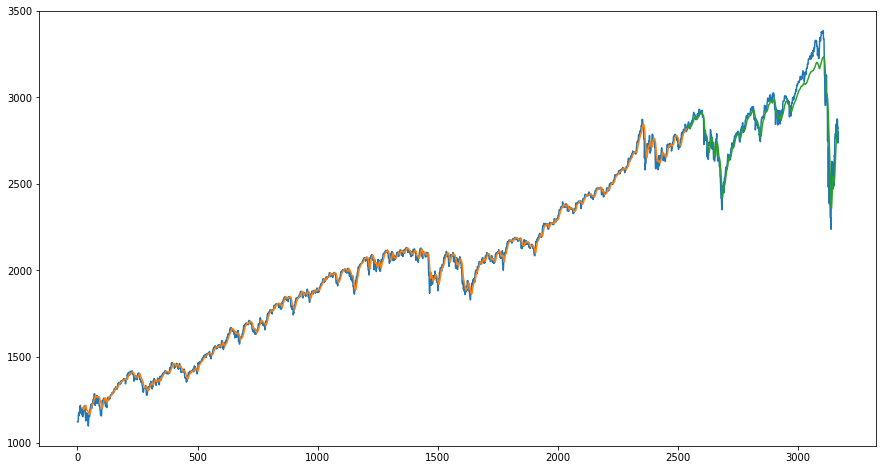

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_SPX)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_train_pred)+look_back, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_SPX)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+look_back-1:len(df_SPX)-1, :] = y_test_pred

# plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(df_SPX))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
abs((21.82-87.27)/21.82)

2.999541704857928

# Conclusion

 

*   Comparing the MSE's between the ARIMA model and the LSTM, it appears that the ARIMA model had a Test RMSE of 30.857 while LSTM had a  Test RMSE of 87.27. It might not be fair to compare two models RMSE, however these are the same datsets, so at the moment I am thinking ARIMA outperformed LSTM.

*   The LSTM model appears to be very accurate compared to the training data, and fairly accurate compared to the test data. I think that's a good sign that we are not overfitting? Further research needed because it appears that the test RMSE is almost 3 times as much as the training RMSE.




# Future Work



1.   Use a CNN as a discriminator on the LSTM generated data.
2.   Create a Natural Language Processing variable for my dataset. Analyze daily news reports and see how that impacts S&P prices 1 day from present day, the 7 day MA, 21 MA, etc.
3.   Use a CNN to analyze Stock charts and see if there are any trends that are not already implemented by today's quants. 


# 3.7. Feature Engineering

###  The rest of the code below was just taken from https://github.com/borisbanushev/stockpredictionai/blob/master/readme.md. I havne't really spent the time to understand it, but it could be useful if I continue with my research. Also, it seems like some cool analysis.

In [ ]:
# print('Total dataset has {} samples, and {} features.'.format(dataset_total_df.shape[0], \
#                                                               dataset_total_df.shape[1]))

In [ ]:
print('Total dataset has {} samples, and {} features.'.format(dataset_TI_df.shape[0], \
                                                              dataset_TI_df.shape[1]))

Total dataset has 3171 samples, and 25 features.


In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Price']
    X = data.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_TI_df)

In [ ]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [ ]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

[01:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
eval_result = regressor.evals_result()

In [ ]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

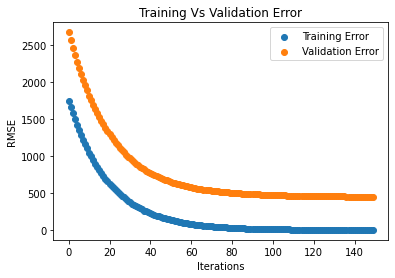

In [ ]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

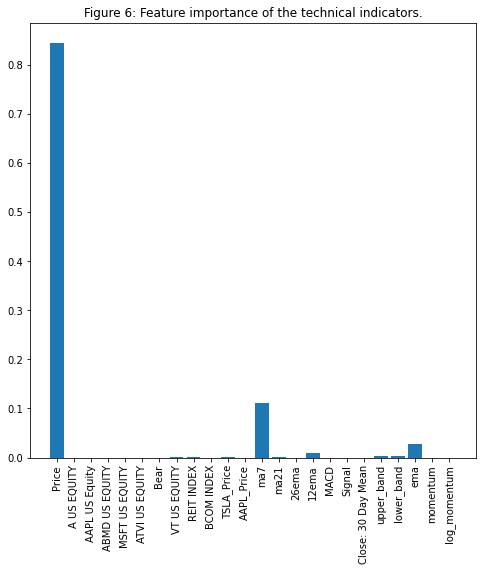

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [ ]:
def gelu(x):
    return 0.5 * x * (1 + math.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * math.pow(x, 3))))
def relu(x):
    return max(x, 0)
def lrelu(x):
    return max(0.01*x, x)

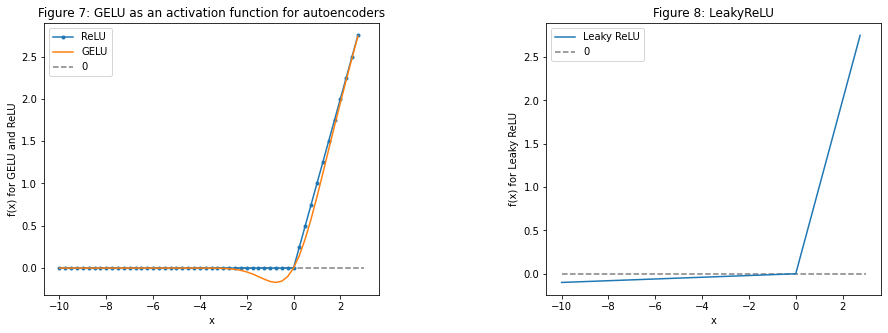

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)

ranges_ = (-10, 3, .25)

plt.subplot(1, 2, 1)
plt.plot([i for i in np.arange(*ranges_)], [relu(i) for i in np.arange(*ranges_)], label='ReLU', marker='.')
plt.plot([i for i in np.arange(*ranges_)], [gelu(i) for i in np.arange(*ranges_)], label='GELU')
plt.hlines(0, -10, 3, colors='gray', linestyles='--', label='0')
plt.title('Figure 7: GELU as an activation function for autoencoders')
plt.ylabel('f(x) for GELU and ReLU')
plt.xlabel('x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in np.arange(*ranges_)], [lrelu(i) for i in np.arange(*ranges_)], label='Leaky ReLU')
plt.hlines(0, -10, 3, colors='gray', linestyles='--', label='0')
plt.ylabel('f(x) for Leaky ReLU')
plt.xlabel('x')
plt.title('Figure 8: LeakyReLU')
plt.legend()

plt.show()